# **CDC Dataset Assignment:**
The dataset has multiple medical indictors and diseases, your task is to create a descriptive analysis of data within the dataset.
–	For example, you’re interested in investigating heart disease.  Within the dataset, can you find any indicators that seem to influence the risk of heart disease?  How do different states compare?


For this dataset, you will need to use:
–	Data wrangling and cleaning
•	Renaming variables
•	Filtering data
•	Data aggregation 
–	Data Visualization techniques
–	Descriptive statistics 
–	Detailed descriptions of everything in your dataset – look up how to add markdown to your notebook


# **My Approach**
First step is to pull in the data set and review for the type of information being provided, if there are any missing values and if so would the missing information impact my analysis. Since I don't know what type of data I'll be working with I'm not sure what my approach for analyzing will be.  

In [ ]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv',index_col=0)
df


,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
encounter_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,MC,?,51,0,16,0,0,0,250.13,291,458,9,None,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30
443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,MC,?,33,3,18,0,0,1,560,276,787,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,MC,?,53,0,9,1,0,0,38,590,296,13,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO


After pulling in the dataset I see that there are question marks '?' in a few of the columns. Im going to want to remove these but I'm still not sure if some of the data is actually missing. I also want to take a look at the dataypes per column so I can start to figure out what conclusions and visuliations I maybe able to capture.  

I still need to confirm if there are any missing values or if the '?' is being used in place of leaving the field blank. The null function below confirms that '?' is being in place of blank, since all the count return as zero. 

In [ ]:
df=pd.DataFrame(df)
df.isnull().sum()

patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitaz

I want to drop any duplicate rows but appears that there are no duplicates. 

In [ ]:
df.drop_duplicates(inplace=True)
df

,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
encounter_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,MC,?,51,0,16,0,0,0,250.13,291,458,9,None,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30
443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,MC,?,33,3,18,0,0,1,560,276,787,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,MC,?,53,0,9,1,0,0,38,590,296,13,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO


At this point I've descided on analyzing the demographic information of the patients (instead of the type of medication, with the exception of insulin). Still not sure what I want to answer for or what the data will reveal but columns 'change' and 'diabetesMed' lets me know if there was any changes to the patients medication and if diabetic medication was provided. I also decided to include 'admission_type_id' and 'payer_code' because I may want to analyze at what type of vist was the patient being prescribed the medication (emergency, elective, etc) and the payer (insurance, self-pay, etc.) 

In [ ]:
df2=df[['race','gender','age','admission_type_id','payer_code','insulin','change','diabetesMed']]
df2

,race,gender,age,admission_type_id,payer_code,insulin,change,diabetesMed
encounter_id,,,,,,,,
2278392,Caucasian,Female,[0-10),6,?,No,No,No
149190,Caucasian,Female,[10-20),1,?,Up,Ch,Yes
64410,AfricanAmerican,Female,[20-30),1,?,No,No,Yes
500364,Caucasian,Male,[30-40),1,?,Up,Ch,Yes
16680,Caucasian,Male,[40-50),1,?,Steady,Ch,Yes
...,...,...,...,...,...,...,...,...
443847548,AfricanAmerican,Male,[70-80),1,MC,Down,Ch,Yes
443847782,AfricanAmerican,Female,[80-90),1,MC,Steady,No,Yes
443854148,Caucasian,Male,[70-80),1,MC,Down,Ch,Yes


By running the unique funtion, I'm able to determine which columns of the ones I selected for my new dataframe has missing values (aka the '?'). I see that race and payer_code have missing data. Instead of removing those Im going to rename them as unknown. I did this (instead of removing) because I still wanted to have data for those races and payers which are unknown.

In [ ]:
for col in df2:
    print(df2[col].unique())


['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']
['Female' 'Male' 'Unknown/Invalid']
['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
[6 1 2 3 4 5 8 7]
['?' 'MC' 'MD' 'HM' 'UN' 'BC' 'SP' 'CP' 'SI' 'DM' 'CM' 'CH' 'PO' 'WC' 'OT'
 'OG' 'MP' 'FR']
['No' 'Up' 'Steady' 'Down']
['No' 'Ch']
['No' 'Yes']


Messed up below (lol). added the missing values function to the original dataset instead of my new one. I created a new dataframe to bring me back to columns I wanted. 

In [ ]:
missing_values=["?"]
df2=pd.read_csv('https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv',na_values=missing_values)
df2

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,MC,NaN,51,0,16,0,0,0,250.13,291,458,9,None,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,MC,NaN,33,3,18,0,0,1,560,276,787,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),NaN,1,1,7,1,MC,NaN,53,0,9,1,0,0,38,590,296,13,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),NaN,2,3,7,10,MC,Surgery-General,45,2,21,0,0,1,996,285,998,9,None,None,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO


In [ ]:
df3=df2[['encounter_id','race','gender','age','admission_type_id','payer_code','insulin','change','diabetesMed']]
df3

,encounter_id,race,gender,age,admission_type_id,payer_code,insulin,change,diabetesMed
0,2278392,Caucasian,Female,[0-10),6,NaN,No,No,No
1,149190,Caucasian,Female,[10-20),1,NaN,Up,Ch,Yes
2,64410,AfricanAmerican,Female,[20-30),1,NaN,No,No,Yes
3,500364,Caucasian,Male,[30-40),1,NaN,Up,Ch,Yes
4,16680,Caucasian,Male,[40-50),1,NaN,Steady,Ch,Yes
...,...,...,...,...,...,...,...,...,...
101761,443847548,AfricanAmerican,Male,[70-80),1,MC,Down,Ch,Yes
101762,443847782,AfricanAmerican,Female,[80-90),1,MC,Steady,No,Yes
101763,443854148,Caucasian,Male,[70-80),1,MC,Down,Ch,Yes
101764,443857166,Caucasian,Female,[80-90),2,MC,Up,Ch,Yes


After selecting the columns I wanted for this analysis, I also wanted to check if the encounter_id could be used as an index column (which would help me with some of the analysis). Using the is_unique function revealed that all the values in the encounters column were unique and since that was the case I could use this column as an index. 

In [ ]:
df3['encounter_id'].is_unique

True

In [ ]:
df3=df3.set_index('encounter_id')
df3.head()

,race,gender,age,admission_type_id,payer_code,insulin,change,diabetesMed
encounter_id,,,,,,,,
2278392,Caucasian,Female,[0-10),6,NaN,No,No,No
149190,Caucasian,Female,[10-20),1,NaN,Up,Ch,Yes
64410,AfricanAmerican,Female,[20-30),1,NaN,No,No,Yes
500364,Caucasian,Male,[30-40),1,NaN,Up,Ch,Yes
16680,Caucasian,Male,[40-50),1,NaN,Steady,Ch,Yes


In [ ]:
df3

,race,gender,age,admission_type_id,payer_code,insulin,change,diabetesMed
encounter_id,,,,,,,,
2278392,Caucasian,Female,[0-10),6,NaN,No,No,No
149190,Caucasian,Female,[10-20),1,NaN,Up,Ch,Yes
64410,AfricanAmerican,Female,[20-30),1,NaN,No,No,Yes
500364,Caucasian,Male,[30-40),1,NaN,Up,Ch,Yes
16680,Caucasian,Male,[40-50),1,NaN,Steady,Ch,Yes
...,...,...,...,...,...,...,...,...
443847548,AfricanAmerican,Male,[70-80),1,MC,Down,Ch,Yes
443847782,AfricanAmerican,Female,[80-90),1,MC,Steady,No,Yes
443854148,Caucasian,Male,[70-80),1,MC,Down,Ch,Yes


Earlier I mentioned replacing the missing values with "Unknown". Using the fillna and the unique functions allows me to do that.

In [ ]:
df3['race'].fillna('Unknown Race', inplace=True)
df3['race'].unique()

array(['Caucasian', 'AfricanAmerican', 'Unknown Race', 'Other', 'Asian',
       'Hispanic'], dtype=object)

In [ ]:
df3['payer_code'].fillna('Unknown Payer', inplace=True)
df3['payer_code'].unique()

array(['Unknown Payer', 'MC', 'MD', 'HM', 'UN', 'BC', 'SP', 'CP', 'SI',
       'DM', 'CM', 'CH', 'PO', 'WC', 'OT', 'OG', 'MP', 'FR'], dtype=object)

After running my first groupby function I have an idea where I want to go with this analysis. The grouping by race revealed that more of the encounters were Caucasian, with African American 2nd. 

In [ ]:
df3.groupby(['race'])['gender'].count()

race
AfricanAmerican    19210
Asian                641
Caucasian          76099
Hispanic            2037
Other               1506
Unknown Race        2273
Name: gender, dtype: int64

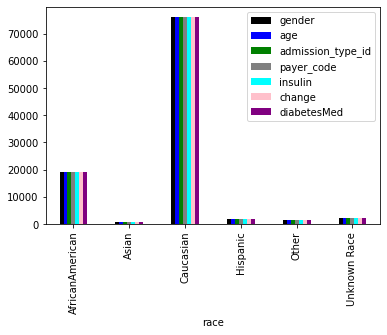

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df3.groupby(['race']).count().plot(kind="bar",  color=['black', 'blue','green','gray','cyan','pink','purple','brown'])

Still analyzing the overall population, I want to get a sense of the age range based on race with the most encounters. By grouping then adding a bar graph, I was able to see that 70-80 year olds had the most encounters. 

In [ ]:
df3.groupby(['age']) ['race'].count()

age
[0-10)        161
[10-20)       691
[20-30)      1657
[30-40)      3775
[40-50)      9685
[50-60)     17256
[60-70)     22483
[70-80)     26068
[80-90)     17197
[90-100)     2793
Name: race, dtype: int64

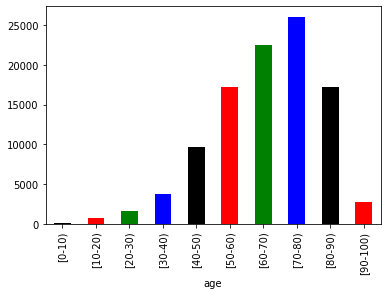

In [ ]:
df3.groupby(['age'])['race'].count().plot(kind="bar",  color=['black', 'red', 'green', 'blue'])

Given the most noticeable difference was between the races, I wanted to understand what the data was revealed concerning race, and the patients that were on insulin or on other diabetic medication. 

In order to answer that question I pulled out the population based on race and for each race their insulin changes and their diabeticMed status. Below are the various counts and graphs starting with Caucasian. 

***Caucasion info below***

In [ ]:
cau_race=df3['race']=='Caucasian'

In [ ]:
df_cau_race=df3[cau_race]
df_cau_race.shape

(76099, 8)

In [ ]:
df_cau_race.groupby(['insulin'])['gender'].count()

insulin
Down       9011
No        36600
Steady    22223
Up         8265
Name: gender, dtype: int64

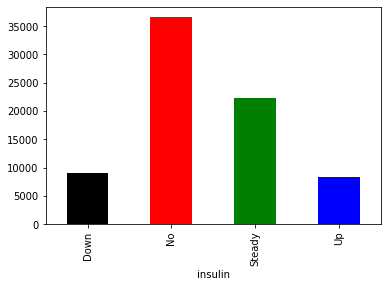

In [ ]:
df_cau_race.groupby(['insulin'])['gender'].count().plot(kind="bar",  color=['black', 'red', 'green', 'blue'])

Seeing that most of the encounters were Causasian I decided to focus on the % of the population based on race. For example the reflects that out of the 101766 encounters, 76099 were Caucasian and out of the 76099, 9011 had a decrease to their insulin, 36600 had no insulin, 22223 had steady insulin and 8265 had an increase (above). 

I was also curious to know of the encounters what would the data reflect concerning diabetic medication and if any particular race would be prone to being on diabetic meds. Below is the breakdown of what the date revealed. 

In [ ]:
df_cau_race.groupby(['diabetesMed'])['age'].count()

diabetesMed
No     17649
Yes    58450
Name: age, dtype: int64

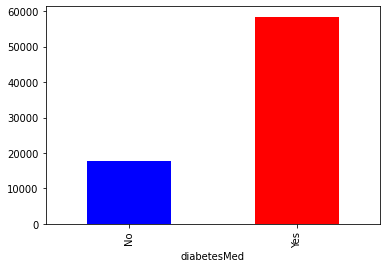

In [ ]:
df_cau_race.groupby(['diabetesMed'])['age'].count().plot(kind="bar", color=['blue','red'])

***African American info below***

In [ ]:
afr_race=df3['race']=='AfricanAmerican'

In [ ]:
df_afr_race=df3[afr_race]
df_afr_race.shape


(19210, 8)

In [ ]:
df_afr_race.head()

,race,gender,age,admission_type_id,payer_code,insulin,change,diabetesMed
encounter_id,,,,,,,,
64410,AfricanAmerican,Female,[20-30),1,Unknown Payer,No,No,Yes
28236,AfricanAmerican,Female,[40-50),1,Unknown Payer,Steady,No,Yes
36900,AfricanAmerican,Male,[60-70),2,Unknown Payer,Steady,Ch,Yes
62256,AfricanAmerican,Female,[60-70),3,Unknown Payer,Steady,No,Yes
73578,AfricanAmerican,Male,[60-70),1,Unknown Payer,Up,Ch,Yes


In [ ]:
df_afr_race.groupby(['insulin'])['gender'].count()

insulin
Down      2445
No        8024
Steady    6555
Up        2186
Name: gender, dtype: int64

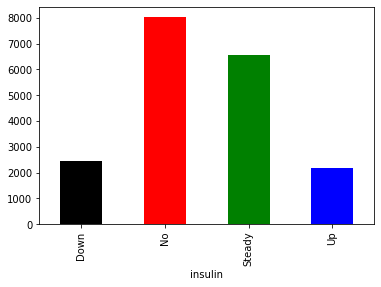

In [ ]:
df_afr_race.groupby(['insulin'])['gender'].count().plot(kind="bar",  color=['black', 'red', 'green', 'blue'])

In [ ]:
df_afr_race.groupby(['diabetesMed'])['age'].count()

diabetesMed
No      4412
Yes    14798
Name: age, dtype: int64

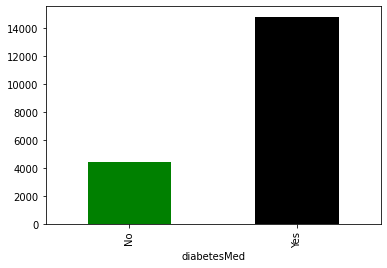

In [ ]:
df_afr_race.groupby(['diabetesMed'])['age'].count().plot(kind="bar", color=['green','black'])

***Hispanic info below***

In [ ]:
his_race=df3['race']=='Hispanic'
df_his_race=df3[his_race]
df_his_race.shape


(2037, 8)

In [ ]:
df_his_race.groupby(['insulin'])['gender'].count()

insulin
Down      253
No        934
Steady    584
Up        266
Name: gender, dtype: int64

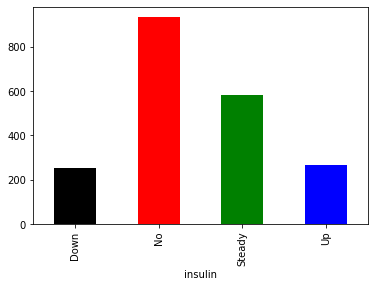

In [ ]:
df_his_race.groupby(['insulin'])['gender'].count().plot(kind="bar",  color=['black', 'red', 'green', 'blue'])

In [ ]:
df_his_race.groupby(['diabetesMed'])['age'].count()

diabetesMed
No      486
Yes    1551
Name: age, dtype: int64

***Asian info below***

In [ ]:
asi_race=df3['race']=='Asian'
df_asi_race=df3[asi_race]
df_asi_race.shape

(641, 8)

In [ ]:
df_asi_race.groupby(['insulin'])['gender'].count()

insulin
Down       69
No        333
Steady    156
Up         83
Name: gender, dtype: int64

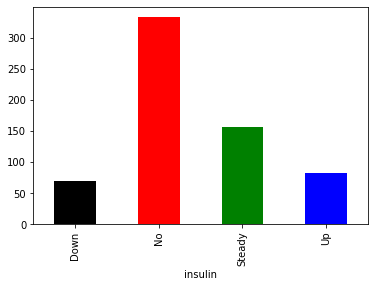

In [ ]:
df_asi_race.groupby(['insulin'])['gender'].count().plot(kind="bar",  color=['black', 'red', 'green', 'blue'])

In [ ]:
df_asi_race.groupby(['diabetesMed'])['age'].count()

diabetesMed
No     166
Yes    475
Name: age, dtype: int64

Data revealed of the encounters most were not on insulin followed by steady insulin. Caucasian & African American had more decrease compared to increase of insulin while Hispanic & Asian had an increase of insulin. The data also revealed that more of the patients were on somesort of diabetic medication for all four races. 

 After analyzing this data I wanted to understand how they compared to each other and if there were any significant differences. I do this by first creating a new data frame with the counts for insulin, diabeticMeds and the precentages (which will be populated later).

In [ ]:
data=[['Caucasian', 76099, 9011, 36600, 22223, 8265, 58450, 17649], ['African American', 19210, 2445, 8024, 6555, 2186, 14798, 4412],['Hispanic', 2037, 253, 934, 584, 266, 1551, 486],['Asian', 641, 69, 333, 156, 83, 475, 166]]
TotalByRace=pd.DataFrame(data, columns=['Race','Total_Encounters','Insulin_Down','Insulin_No','Insulin_Steady','Insulin_Up','DiabeticMeds_Yes','DiabeticMeds_No'])
TotalByRace

,Race,Total_Encounters,Insulin_Down,Insulin_No,Insulin_Steady,Insulin_Up,DiabeticMeds_Yes,DiabeticMeds_No
0,Caucasian,76099,9011,36600,22223,8265,58450,17649
1,African American,19210,2445,8024,6555,2186,14798,4412
2,Hispanic,2037,253,934,584,266,1551,486
3,Asian,641,69,333,156,83,475,166


In [ ]:
TotalByRace.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Race              4 non-null      object
 1   Total_Encounters  4 non-null      int64 
 2   Insulin_Down      4 non-null      int64 
 3   Insulin_No        4 non-null      int64 
 4   Insulin_Steady    4 non-null      int64 
 5   Insulin_Up        4 non-null      int64 
 6   DiabeticMeds_Yes  4 non-null      int64 
 7   DiabeticMeds_No   4 non-null      int64 
dtypes: int64(7), object(1)
memory usage: 384.0+ bytes


After creating the dataframe and confirming my datatypes, I calculate the percentages of the various Insulin status and the DiabeticMed status and add them as additional columns to the new dataframe (below). 

In [ ]:
TotalByRace['%InsulinDown']=((TotalByRace['Insulin_Down']/TotalByRace['Total_Encounters']) *100).round(2)
TotalByRace['%InsulinNo']=((TotalByRace['Insulin_No']/TotalByRace['Total_Encounters']) *100).round(2)
TotalByRace['%InsulinSteady']=((TotalByRace['Insulin_Steady']/TotalByRace['Total_Encounters']) *100).round(2)
TotalByRace['%InsulinUp']=((TotalByRace['Insulin_Up']/TotalByRace['Total_Encounters']) *100).round(2)
TotalByRace['%DiabeticMedYes']=((TotalByRace['DiabeticMeds_Yes']/TotalByRace['Total_Encounters']) *100).round(2)
TotalByRace['%DiabeticMedNo']=((TotalByRace['DiabeticMeds_No']/TotalByRace['Total_Encounters']) *100).round(2)
TotalByRace

,Race,Total_Encounters,Insulin_Down,Insulin_No,Insulin_Steady,Insulin_Up,DiabeticMeds_Yes,DiabeticMeds_No,%InsulinDown,%InsulinNo,%InsulinSteady,%InsulinUp,%DiabeticMedYes,%DiabeticMedNo
0,Caucasian,76099,9011,36600,22223,8265,58450,17649,11.84,48.10,29.20,10.86,76.81,23.19
1,African American,19210,2445,8024,6555,2186,14798,4412,12.73,41.77,34.12,11.38,77.03,22.97
2,Hispanic,2037,253,934,584,266,1551,486,12.42,45.85,28.67,13.06,76.14,23.86
3,Asian,641,69,333,156,83,475,166,10.76,51.95,24.34,12.95,74.10,25.90


In [ ]:

import numpy as np

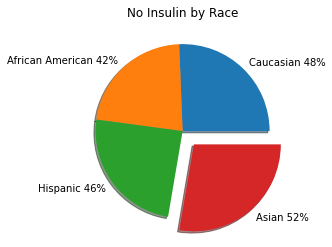

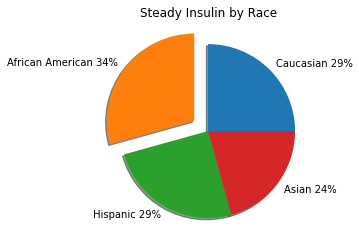

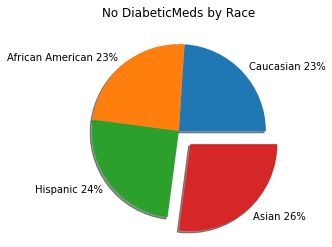

In [ ]:
y=np.array([48.10,41.77,45.85,51.95])
mylabels=['Caucasian 48%','African American 42%','Hispanic 46%','Asian 52%']
myexplode=[0, 0, 0, 0.2]
plt.title('No Insulin by Race')
plt.pie(y, labels=mylabels, explode=myexplode, shadow=True)
plt.show()
a=np.array([29,34,29,24])
mylablesa=['Caucasian 29%','African American 34%','Hispanic 29%','Asian 24%']
myexplodea=[0, 0.2, 0,0]
plt.title('Steady Insulin by Race')
plt.pie(a, labels=mylablesa, explode=myexplodea, shadow=True)
plt.show()
b=np.array([23,23,24,26])
mylablesb=['Caucasian 23%','African American 23%','Hispanic 24%','Asian 26%']
myexplodeb=[0, 0, 0, 0.2]
plt.title('No DiabeticMeds by Race')
plt.pie(b, labels=mylablesb, explode=myexplodeb, shadow=True)
plt.show()

In conclusion though there were no significant differences of insulin based on race, the data did reflect the slight differences between the various races.For example though Caucasians made up more of the encounters,**52%** of the encounters of the Asian population are not on insulin (***which is at least 4% higher percentage compared to the other races***) while **34%** of African Americans who had encounters did have steady Insulin (***which is at least 5% higher than the other races***). It also revealed **26%** of encounters from the Asian population were not have diabeticMeds (***which is at least 2% higher than the others***). Also note the analysis did not include unknown races. 